<a href="https://colab.research.google.com/github/PrabishaPradeep/Dsa/blob/main/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# let's start with importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
# load the titanic dataset into python environment

titanic = pd.read_csv('/content/titanic_dataset .csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# check the basic details of the dataset

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


there are five categorical columns which includes ' Name', 'Sex' , 'Ticket' , 'Cabin' , 'Embarked'.

In [ ]:
# check for null values

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there are missing values in the columns 'Age' , 'Cabin' , 'Embarked'

In [ ]:
#Calculate the skew for 'AGE' column

titanic['Age'].skew()

#if the skewness value < -1 or > +1 -- Highly skewed distribution
#if the skewness value is between -1 & -1/2 or between +1/2 & +1 -- Moderately␣ skewed distribution
#if the skewness value between -1/2 & +1/2 -- Approximately symmetric distribution

0.38910778230082704

<Axes: >

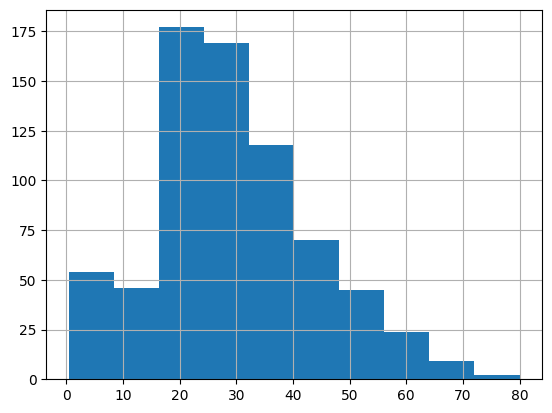

In [ ]:
titanic['Age'].hist()

Here the skewness value is between -1/2 & +1/2 hence Approximately symmetric. hist plot of age shows thai it is moderatly skewed

In [ ]:
# replace the missing values in 'Age' column with median , since the distribution is slightly skewed.

titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [ ]:
# replace the missing values  'Embarked' column with mode, since it is a categorical data.

titanic['Embarked']=titanic['Embarked'].fillna((titanic['Embarked'].mode()[0]))

In [ ]:
# Drop unnecessary columns

titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Convert categorical features into numerical

le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


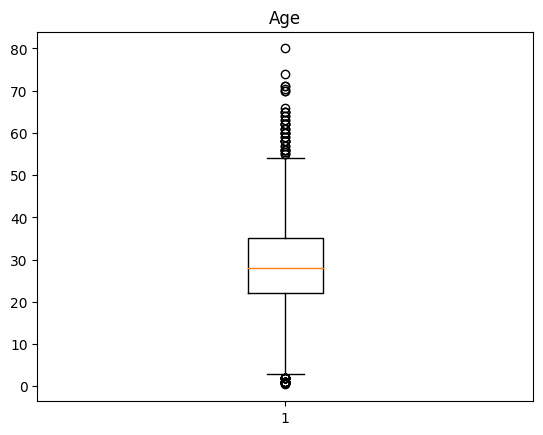

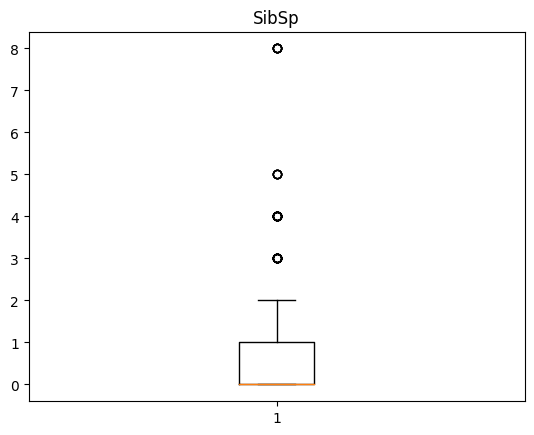

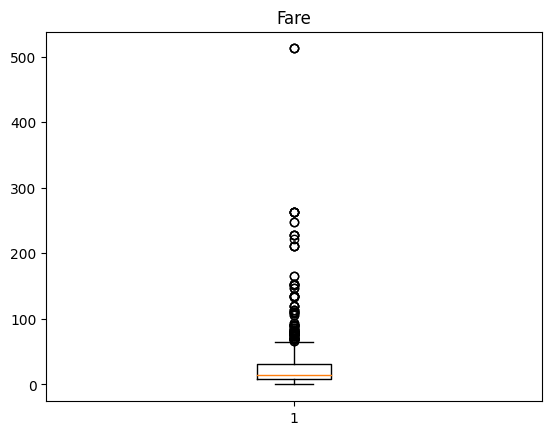

In [ ]:
# check outliers in 'Age','SibSp' and 'Fare' columns in the dataset

for i in titanic[['Age','SibSp','Fare']]:
  plt.figure()
  plt.boxplot(titanic[i])  # BOXPLOT
  plt.title(i);

outliers present in 'Age' ,'SibSp', 'Fare' column

In [ ]:
#handle outliers using IQR method

for i in ['SibSp','Parch','Fare']:
    Q1=np.percentile(titanic[i],25,method='midpoint')
    Q2=np.percentile(titanic[i],50,method='midpoint')
    Q3=np.percentile(titanic[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in titanic[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    titanic[i]=titanic[i].clip(lower=low_lim,upper=up_lim)

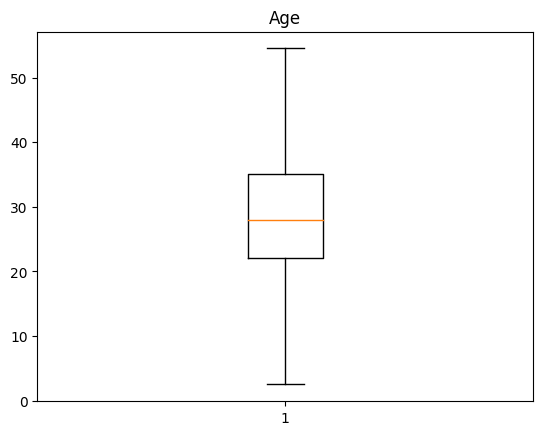

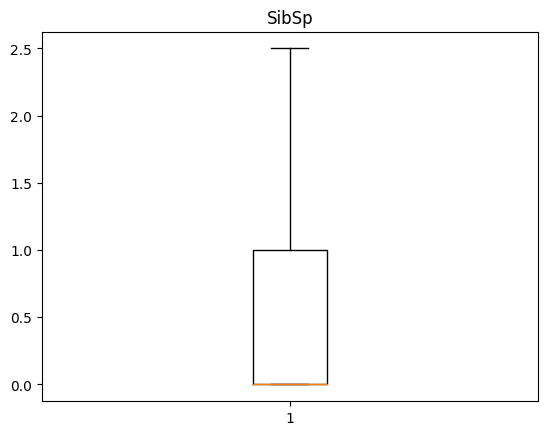

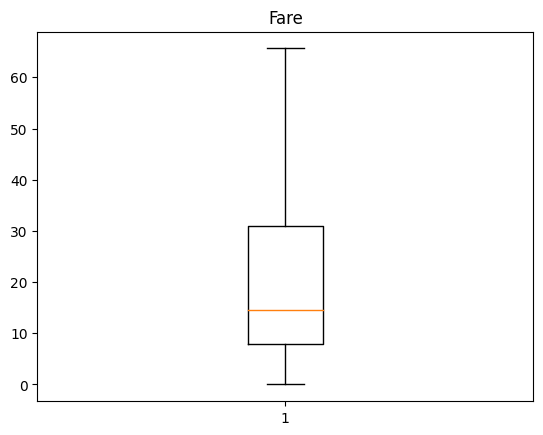

In [ ]:
for i in titanic[['Age','SibSp','Fare']]:
  plt.figure()
  plt.boxplot(titanic[i])  # BOXPLOT
  plt.title(i);

In [ ]:
# Define features (X) and target (y) and split the data

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create kNN and SVM models

knn_model = KNeighborsClassifier()
svm_model = SVC()

In [ ]:
# Step 4: Do k-fold and stratified k-fold cross-validation techniques and find the average accuracy score of the models
# Initialize k-fold and stratified k-fold

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Perform k-fold cross-validation for kNN model
knn_cv_scores = cross_val_score(knn_model, X, y, cv=k_fold, scoring='accuracy')
knn_avg_accuracy = knn_cv_scores.mean()
print("kNN Average Accuracy (k-fold):", knn_avg_accuracy)

kNN Average Accuracy (k-fold): 0.6891343920657838


In [ ]:
# Perform stratified k-fold cross-validation for kNN model

stratified_knn_cv_scores = cross_val_score(knn_model, X, y, cv=stratified_k_fold, scoring='accuracy')
stratified_knn_avg_accuracy = stratified_knn_cv_scores.mean()
print("kNN Average Accuracy (stratified k-fold):", stratified_knn_avg_accuracy)

kNN Average Accuracy (stratified k-fold): 0.716019082292386


In [ ]:
# Perform k-fold cross-validation for SVM model

svm_cv_scores = cross_val_score(svm_model, X, y, cv=k_fold, scoring='accuracy')
svm_avg_accuracy = svm_cv_scores.mean()
print("SVM Average Accuracy (k-fold):", svm_avg_accuracy)

SVM Average Accuracy (k-fold): 0.67452765049275


In [ ]:
# Perform stratified k-fold cross-validation for SVM model

stratified_svm_cv_scores = cross_val_score(svm_model, X, y, cv=stratified_k_fold, scoring='accuracy')
stratified_svm_avg_accuracy = stratified_svm_cv_scores.mean()
print("SVM Average Accuracy (stratified k-fold):", stratified_svm_avg_accuracy)

SVM Average Accuracy (stratified k-fold): 0.6868620927750925
